<a href="https://colab.research.google.com/github/PriankaKibria17/food-sales-predictions/blob/main/FINAL%20PROJECT_SALES%20PREDICTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prianka Kibria 

3.25.22

Summary:

We are presented with sales predictions for supermarkets based on products. Each product is unique in terms of its features. In this data you will find prediction models that can potentially aid in sales success. The predictions are inclusive to products and properties that aid in sales. The models that are being used are (1) linnear regression and (2) a decision tree. The linnear regression had a much lower R2 train and test score of 0.56. This score was significantly lower than the decision tree model which gave us a train R2 score of 0.60 and a test R2 score of 0.59. As you can see the score has increased slightly which has a probability in better predictions. Based on these predictions which products should be sold more, success rates in different types of markets and more.

my presenation can be found here: https://docs.google.com/presentation/d/1CrAeZJGqGP3vMQ1kqHdUuoaV2-8cd0lE/edit?usp=sharing&ouid=114921905489288547532&rtpof=true&sd=true

****the codes to the visualizations can be found at the end of this page***

We can see below that over time the sales has fluctuated. The sales to establishment ratio differs. The sales were at its peak in 1985 and dropped significantly in 1998 and went back up slightly in 2010.


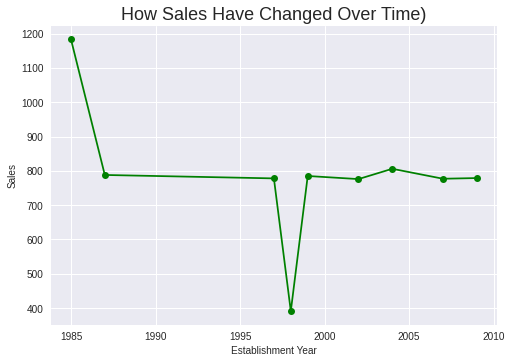

Sales based on iten time also differ, it appears that starchy foods are sold the most in contrast to the rest of the food groups being sold. We can also see which food groups are the most popular such as starchy foods, seafood, snack foods and fruits & vegetables.

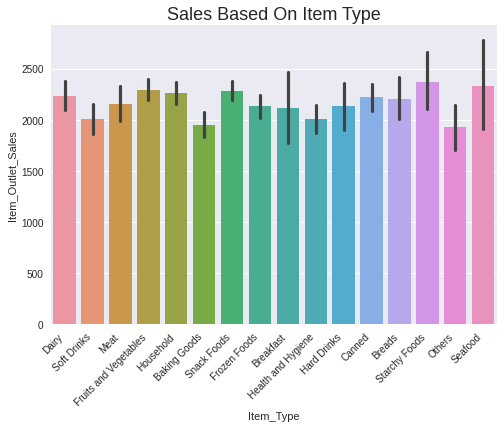

In [246]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn import preprocessing

In [247]:
set_config(display='diagram')

In [248]:
path = ('/content/drive/MyDrive/data/sales_predictions.csv')
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


* Outlet size - ordinal
* Item Identifier - nominal
* Item Weight - numeric
* Item fat content - nominal
* Item visibility - numeric
* item type - nominal
* item mrp - numeric
* outlet identifier - nominal
* outlet establishment yr - numeric
* outlet loc type - nominal
* outlet type - nominal
* item outlet sales - numeric

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [250]:
df.duplicated().sum()

0

In [251]:
df.loc[:, df.isna().any()]

,Item_Weight,Outlet_Size
0,9.300,Medium
1,5.920,Medium
2,17.500,Medium
3,19.200,NaN
4,8.930,High
...,...,...
8518,6.865,High
8519,8.380,NaN
8520,10.600,Small
8521,7.210,Medium


In [252]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [253]:
df.drop(columns = ['Item_Identifier'], axis=1, inplace=True)

In [254]:
df.drop(columns = ['Outlet_Identifier'], axis=1, inplace=True)

In [255]:
df['Item_Weight'].fillna(value=df['Item_Weight'].mean(), inplace=True)

In [256]:
df['Item_Visibility'].fillna(value = df ['Item_Visibility'].mean(), inplace = True)

In [257]:
df.isna().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [258]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [259]:
df.replace(['LF', 'low fat'], ['Low Fat', 'Low Fat'], inplace = True)
df.replace(['Reg', 'reg'], ['Regular', 'Regular'], inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [260]:
#label_encoder = preprocessing.LabelEncoder()
#df['Item_Fat_Content'] = label_encoder.fit_transform(df['Item_Fat_Content'])
#df['Item_Fat_Content'].unique()


In [261]:
#df['Item_Type'] = label_encoder.fit_transform(df['Item_Type'])
#df['Item_Type'].unique()

In [262]:
#df['Outlet_Location_Type'] = label_encoder.fit_transform(df['Outlet_Location_Type'])
#df['Outlet_Location_Type'].unique()

In [263]:
#df['Outlet_Type'] = label_encoder.fit_transform(df['Outlet_Type'])
#df['Outlet_Type'].unique()

In [264]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [265]:
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [266]:
df['Outlet_Size'].replace({'High': 2, 'Small': 0, 'Medium': 1}, inplace = True)

In [267]:
df['Outlet_Size'].value_counts()

1    5203
0    2388
2     932
Name: Outlet_Size, dtype: int64

In [268]:
X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [269]:
cat_selector = make_column_selector(dtype_include = 'object')

In [270]:
cat_selector(X_train)

['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']

In [271]:
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data


,Item_Fat_Content,Item_Type,Outlet_Location_Type,Outlet_Type
4776,Low Fat,Household,Tier 3,Supermarket Type2
7510,Regular,Snack Foods,Tier 3,Supermarket Type2
5828,Regular,Meat,Tier 1,Supermarket Type1
5327,Low Fat,Baking Goods,Tier 2,Supermarket Type1
4810,Low Fat,Frozen Foods,Tier 2,Supermarket Type1
...,...,...,...,...
5734,Regular,Fruits and Vegetables,Tier 3,Grocery Store
5191,Low Fat,Frozen Foods,Tier 2,Supermarket Type1
5390,Low Fat,Health and Hygiene,Tier 2,Supermarket Type1
860,Low Fat,Snack Foods,Tier 2,Supermarket Type1


In [272]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)
scaler = StandardScaler()

ohe_tuple = (ohe, cat_selector)
scaler_tuple = (scaler, num_selector)

transformer = make_column_transformer(scaler_tuple, ohe_tuple, remainder='passthrough')

In [273]:
ohe_encoder.fit(train_cat_data)
#transform both the training and the testing data
train_ohe = ohe_encoder.transform(train_cat_data)
test_ohe = ohe_encoder.transform(test_cat_data)
train_ohe

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [274]:
#convert back to a dataframe
ohe_column_names = ohe_encoder.get_feature_names(train_cat_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)
train_ohe


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [275]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [276]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [277]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5450137790>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5450036750>)])

In [278]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5450137790>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5450036750>)])

In [279]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [280]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are ', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are  float64


shape of data is (6392, 30)




array([[ 0.81916441, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.55825754, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12958785,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11564949, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76791667, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81916441, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [281]:
# create a numeric selector
num_selector = make_column_selector(dtype_include='number')
# isolate the numeric columns
train_nums = X_train[num_selector(X_train)].reset_index(drop=True)
test_nums = X_test[num_selector(X_test)].reset_index(drop=True)
# re-combine the train and test sets on axis 1 (columns)
X_train_processed = pd.concat([train_nums, train_ohe], axis=1)
X_test_processed = pd.concat([test_nums, test_ohe], axis=1)
X_train_processed


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,16.350,0.029565,256.4646,2009,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,15.250,0.000000,179.7660,2009,1,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,12.350,0.158716,157.2946,1999,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7.975,0.014628,82.3250,2004,0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,19.350,0.016645,120.9098,2002,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,9.395,0.286345,139.1838,1998,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,15.600,0.117575,75.6670,2007,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,17.600,0.018944,237.3590,2002,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,20.350,0.054363,117.9466,2007,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [282]:
transformer.fit(X_train, y_train)
final_cols = transformer.get_feature_names_out()

1) Your first task is to build a linear regression model to predict sales.

Build a linear regression model. Evaluate the performance of your model based on r^2. Evaluate the performance of your model based on rmse.

In [283]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [298]:
reg = LinearRegression()
reg.fit(X_train_processed, y_train)

LinearRegression()

In [299]:
train_score = reg.score(X_train_processed, y_train)
print(train_score)

0.5605777628865849


In [301]:
test_score = reg.score(X_test_processed, y_test)
print(test_score)

0.5659357219300999


In [302]:
train_preds = reg.predict(X_train_processed)
test_preds = reg.predict(X_test_processed)

In [303]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))





print('The R2 train score is', r2_train)
print('The R2 test score is', r2_test)
print('The MAE train score is', mae_train)
print('The MAE test score is', mae_test)
print('The MSE train score is', mse_train)
print('The MSE test score is', mse_test)
print('The RMSE train score is', rmse_train)
print('The RMSE test score is', rmse_test)

The R2 train score is 0.5605777628865849
The R2 test score is 0.5659357219300999
The MAE train score is 847.4170543522491
The MAE test score is 805.2707884300414
The MSE train score is 1300450.6463211186
The MSE test score is 1197573.4846430465
The RMSE train score is 1140.3730294605878
The RMSE test score is 1094.3370068872964


2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model. Compare the performance of your model based on r^2. Compare the performance of your model based on rmse.

In [304]:
from sklearn.tree import DecisionTreeRegressor

In [305]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [306]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [308]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [309]:
# evaluate the model
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print('The train score is', train_score)
print('The test score is',test_score)


The train score is 1.0
The test score is 0.18923565408996068


In [310]:
# Looking at options for tuning this model
dec_tree.get_depth()

40

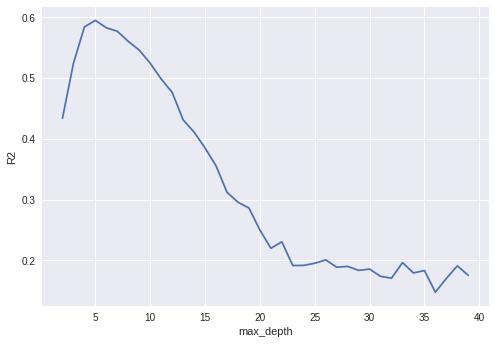

In [311]:
max_depth_range = list(range(2, 40)) # will try every value between 2 and 33
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');



From the plot above it looks like the best score for the model is when the parameter max depth is 5.

In [312]:
# Let's run the model with our optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(train_5_score)
print(test_5_score)

0.6039397477322956
0.5947099753159972


3) You now have tried 2 different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend? Justify your recommendation. 4) To finalize this project, you need to prepare an executive (non-technical) presentation about your project.

The decision model is a good fit because the bias/variance are not too far off as well as it is as close as we can get to 50% and to the original model.


#visualizations

Text(0.5, 1.0, 'How Sales Have Changed Over Time)')

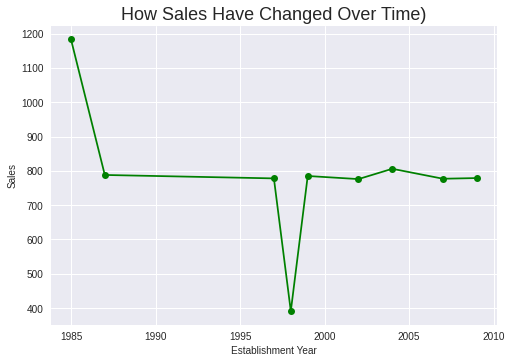

In [313]:
numberuniqueyr = df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].nunique()
uniqueyr = list(numberuniqueyr.index)
numbersales_yr = list(numberuniqueyr.values)

plt.style.use('seaborn')
plt.plot(uniqueyr, numbersales_yr, c='green', marker = 'o')
plt.xlabel('Establishment Year', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.title('How Sales Have Changed Over Time)', fontsize = 18)

Text(0.5, 1.0, 'Outlet Type vs Sales')

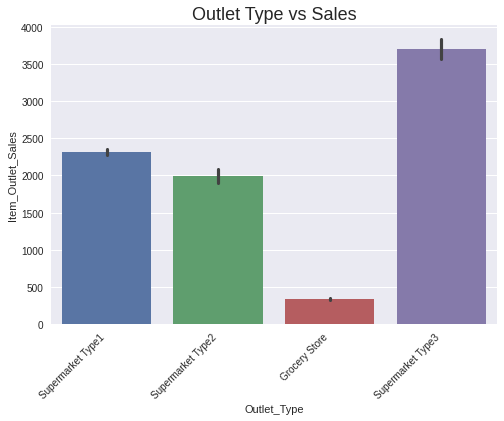

In [314]:
import seaborn as sns

sns.barplot(data=df, x='Outlet_Type', y = 'Item_Outlet_Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Outlet Type vs Sales', fontsize = 18)


Text(0.5, 1.0, 'Sales Based On Item Type')

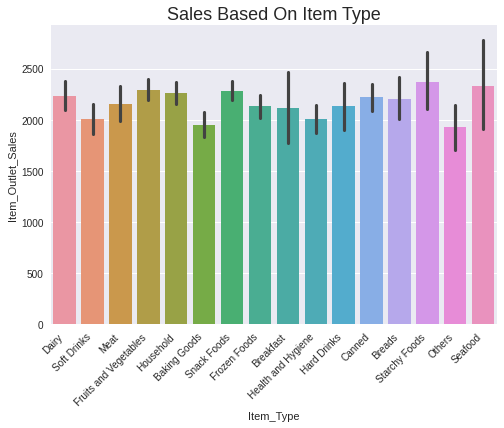

In [315]:
sns.barplot(data=df, x='Item_Type', y = 'Item_Outlet_Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Sales Based On Item Type', fontsize = 18)

Text(0.5, 1.0, 'Sales Based On Item Fat Content')

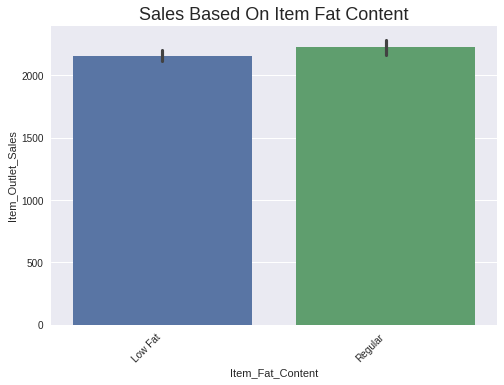

In [316]:
sns.barplot(data=df, x='Item_Fat_Content', y = 'Item_Outlet_Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Sales Based On Item Fat Content', fontsize = 18)